# Πού Είναι τα Ταξί στη Νέα Υόρκη;

* Εμπνευσμένο από το κεφάλαιο 2 του βιβλίου του Cyrille Rossant, Learning IPython for Interactive Computing and Data Visualization, 2η έκδοση, Packt Publishing, 2015.

* Ξεκινάμε εισάγοντας τις βιβλιοθήκες που θα χρειαστούμε.

* Η βιβλιοθήκη [NumPy](https://numpy.org/) υλοποιηθεί πολύ βελτιστοποιημένες πράξεις πινάκων στην Python.

* Η βιβλιοθήκη [pandas](https://pandas.pydata.org/) είναι η βασική βιβλιοθήκη για την επεξεργασία δεδομένων στην Python.

* Με τη βιβλιοθήκη [matplotlib](https://matplotlib.org/) μπορούμε να οπτικοποιούμε τα δεδομένα μας.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Τώρα μπορούμε να διαβάσουμε τα δεδομένα που θα χρησιμοποιήσουμε.

* Tα δεδομένα αρχικά έγιναν διαθέσιμα χάρη στον [Chris Wong](https://chriswhong.com/) το 2013 κατόπιν [αίτησής του σύμφωνα με τη νομοθεσία για την ελευθερία της πληροφορίας (Freedom of Information Law, FOIL)](https://chriswhong.com/open-data/foil_nyc_taxi/).

* Εμείς θα χρησιμοποιήσουμε ένα τυχαίο δείγμα του 1% των δεδομένων.

* Νεότερα δεδομένα είναι διαθέσιμα από το [NYC Taxi and Limousine Commission (TLC)](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

In [52]:
data_filename = "C:/Users/xrist/OneDrive/Υπολογιστής/data/Data-Science-Tutorials/data/nyc_taxi_trip_data_sample.csv"

* Για να διαβάσουμε τα δεδομένα θα χρησιμοποιήσουμε τη συνάρτηση `read_csv()` του pandas.


In [53]:
data = pd.read_csv(data_filename)

* Η μεταβλητή `data` περιέχει ένα αντικείμενο `DataFrame`. 

* Ένα `DataFrame` είναι ένας πίνακας που περιέχει γραμμές (παρατηρήσεις) και στήλες (χαρακτηριστικά). 

* Ένα `DataFrame` μπορεί να περιέχει κείμενο, αριθμούς, ημερομηνίες, και άλλους τύπους δεδομένων. 

#  FILTER AND SHOW ONLY NON-ZERO VALUES # ΤΟDO

In [54]:
# FILTER AND SHOW ONLY NON-ZERO VALUES  #TODO
null_values = data.isnull().sum()
null_values

missing_percentages = (null_values/len(data))*100
missing_percentages

medallion              0.000000
hack_license           0.000000
vendor_id              0.000000
rate_code              0.000000
store_and_fwd_flag    49.953950
pickup_datetime        0.000000
dropoff_datetime       0.000000
passenger_count        0.000000
trip_time_in_secs      0.000000
trip_distance          0.000000
pickup_longitude       0.000000
pickup_latitude        0.000000
dropoff_longitude      0.001732
dropoff_latitude       0.001732
dtype: float64

In [55]:
data['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    846092
Y     20604
Name: count, dtype: int64

In [56]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [57]:
data.drop(columns='store_and_fwd_flag' ,axis=1, inplace=True)


In [58]:
data.shape

(1731797, 13)

# delete NaNs in Specific Columns   

In [59]:
data = data.dropna(subset=['dropoff_longitude', 'dropoff_latitude'])
data.shape

(1731767, 13)

* Μπορούμε να δούμε τις διαστάσεις ενός `DataFrame` χρησιμοποιώντας την ιδιότητα `shape`.

* Η μέθοδος `head()` μας δίνει τις αρχικές γραμμές ενός `DataFrame`.

* Μπορούμε επίσης να το χειριστούμε με το συνηθισμένο συντακτικό της Python για ακολουθίες δεδομένων:

* Η μέθοδος `describe()` μας δίνει βασικά στοιχεία περιγραφικής στατιστικής.

* Η βασική βιβλιοθήκη για οπτικοποίηση δεδομένων με την Python είναι η [matplotlib](https://matplotlib.org/).

* Θα εξετάσουμε τα σημεία της πόλης στα οποία οι επιβάτες μπαίνουν σε ταξί.

* Το πρώτο βήμα είναι να βρούμε τις γεωγραφικές συντεταγμένες των σημείων από το `DataFrame`.

* Για να θυμηθούμε ποιες είναι οι στήλες.

* Υπάρχουν τέσσερεις στήλες που αντιστοιχούν στις συντεταγμένες όπου ο επιβάτης μπαίνει και κατεβαίνει από το όχημα:

  * `pickup_longitude`
  * `pickup_latitude`
  * `dropoff_longitude`
  * `dropoff_latitude`

* Θα επικεντρωθούμε όπως είπαμε στα σημεία που ξεκινάει μια διαδρομή.

* Μπορούμε να αναφερθούμε σε μία στήλη ενός `DataFrame` δίνοντας το όνομα του `DataFrame`, τελεία, και το όνομα της στήλης:

In [60]:
data['pickup_longitude']


0         -73.990089
1         -73.960022
2         -73.970634
3         -73.992661
4         -73.999107
             ...    
1731792   -73.995766
1731793     0.000000
1731794   -73.991554
1731795   -73.865715
1731796   -74.002968
Name: pickup_longitude, Length: 1731767, dtype: float64

* Κάθε στήλη είναι ένα αντικείμενο τύπου `Series`.

* Άρα, ένα `DataFrame` είναι τελικά ένα σύνολο από στήλες τύπου `Series`.

* Πριν είδαμε ότι κάποιες από τις τιμές του `DataFrame` δεν βγάζουν νόημα.

* Το εύρος τιμών του γεωγραφικού πλάτους θα πρέπει να είναι μεταξύ 0 και 90 μοιρών.

* Είναι όμως πράγματι έτσι;

* Μπορούμε να το εξακριβώσουμε καλώντας τις κατάλληλες μεθόδους στα αντικείμενα `Series` της στήλης που μας ενδιάφερει.

In [61]:
# TODO MAX MIN PRICE OF pickup_longitude
min_value = data['pickup_longitude'].min()
max_value = data['pickup_longitude'].max()
print("Min value:", min_value)
print("Max value:", max_value)


Min value: -740.02167
Max value: 51.977318


* Αν θέλουμε να ορίσουμε ένα φίλτρο στις τιμές μιας στήλης, ξεκινάμε ορίζοντας τη συνθήκη που μας ενδιαφέρει.

* Μια λογική συνθήκη σε μία στήλη επιστρέφει ένα λογικό διάνυσμα (με τιμές `True` και `False`):

* Αν δώσουμε ένα λογικό διάνυσμα σε ένα `DataFrame` παίρνουμε τις γραμμές του `DataFrame` για τις οποίες το διάνυσμα έχει την τιμή `True`.

* Εδώ όμως θέλουμε το γεωγραφικό πλάτος (pickup_latitude) να είναι από το 0 έως και το 90.

* Αυτό μπορούμε να το κάνουμε συνδέοντας τις δύο αντίστοιχες λογικές συνθήκες με τον τελεστή `&` (o αντίστοιχος διαζευκτικός τελευστής, ή, είναι ο `|`).

In [62]:
# TODO double filtering pickup_latitude >= 0 and pickup_latitude <=90

filtered_df = data[(data['pickup_latitude'] >= 0) & (data['pickup_latitude'] <= 90) & (data['dropoff_longitude'] >= -180) & (data['dropoff_latitude'] <= 0)]
filtered_df[:-1]

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
148,8C8A1481A019901E6DD5E4FA3C49C61B,F051238AE9EF6EE48C5DE7838212F7F8,CMT,1,2013-01-27 04:04:28,2013-01-27 04:16:51,1,743,3.90,0.000000,0.000000,0.0,0.0
211,F96FCBB3EF42D0992D228D2A44C35787,5C1FFC9372F762880A22B1B83FB86DF5,CMT,1,2013-01-27 00:33:56,2013-01-27 00:40:05,1,369,1.50,0.000000,0.000000,0.0,0.0
225,7108621119A6C9F88639BD26B0967F40,C2F57EB09DF16CD70A0F9B8A74AFDC27,CMT,1,2013-05-21 04:52:03,2013-05-21 04:59:42,1,459,5.50,0.000000,0.000000,0.0,0.0
384,3FCDBF4730E6E18FDBA01D6EDA29FF5A,229C84C2E3A7D29094103ED6BC25A864,CMT,1,2013-02-01 15:23:54,2013-02-01 15:35:12,1,677,1.80,0.000000,0.000000,0.0,0.0
396,B4F0FFEF3900DBC2D41A3E465BBD0A71,129CC5DF16DA30A3C4C47D8FBCCBEC1C,CMT,1,2013-12-19 03:23:56,2013-12-19 03:27:12,3,195,0.50,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731510,3780040B8F52026C9141895FA997EAAB,833ECDE53ECA81940D6DC3C944AE9FEB,CMT,1,2013-09-14 12:19:59,2013-09-14 12:28:52,1,533,1.70,0.000000,0.000000,0.0,0.0
1731515,75B38A8DE8DCE855A5BFEFD924E73404,0A1A0478120C8A7B0C035A06321D3B91,VTS,1,2013-01-19 16:50:00,2013-01-19 17:01:00,2,660,2.32,-73.991524,40.743938,0.0,0.0
1731660,F3BA458FFB70903630ABF3332CB983F1,53E828672C55E20A154F84C2CB195A2B,VTS,1,2013-03-19 04:17:00,2013-03-19 04:23:00,6,360,1.88,0.000000,0.000000,0.0,0.0
1731711,99DC8B92B9DD3926C5FDC362893ED8C3,CD6A8D56FA4FCFE68C1C44A66FD7BF1F,VTS,1,2013-07-01 07:33:00,2013-07-01 07:48:00,1,900,3.34,0.000000,0.000000,0.0,0.0


* Αλλά ακόμα δεν τελειώσαμε, θέλουμε και το γεωγραφικό μήκος να είναι από το -180 έως και το 0, άρα συνδέουμε και τις επιπλέον λογικές συνθήκες.

In [70]:
longitude_c = filtered_df['pickup_longitude']
latitude_c = filtered_df['pickup_latitude']

In [71]:
def lng_lat_to_pixels(lng, lat):    
    lng_rad = lng * np.pi / 180
    lat_rad = lat * np.pi / 180
    x = (256/(2*np.pi))*(lng_rad + np.pi)
    y = (256/(2*np.pi))*(np.log(np.tan(np.pi/4 + lat_rad/2)))
    return (x,y)

latit_long = lng_lat_to_pixels(longitude_c,latitude_c)
latit_long

(148        128.000000
 211        128.000000
 225        128.000000
 384        128.000000
 396        128.000000
               ...    
 1731515     75.383805
 1731660    128.000000
 1731711    128.000000
 1731788    128.000000
 1731793    128.000000
 Name: pickup_longitude, Length: 28189, dtype: float64,
 148       -4.523456e-15
 211       -4.523456e-15
 225       -4.523456e-15
 384       -4.523456e-15
 396       -4.523456e-15
                ...     
 1731515    3.177813e+01
 1731660   -4.523456e-15
 1731711   -4.523456e-15
 1731788   -4.523456e-15
 1731793   -4.523456e-15
 Name: pickup_latitude, Length: 28189, dtype: float64)

In [72]:
filtered_df['pixel_coordinates'] = filtered_df.apply(lambda row : lng_lat_to_pixels(row['pickup_longitude'],row['pickup_latitude']), axis = 1)
filtered_df

C:\Users\xrist\AppData\Local\Temp\ipykernel_5716\7857781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pixel_coordinates'] = filtered_df.apply(lambda row : lng_lat_to_pixels(row['pickup_longitude'],row['pickup_latitude']), axis = 1)


,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pixel_coordinates
148,8C8A1481A019901E6DD5E4FA3C49C61B,F051238AE9EF6EE48C5DE7838212F7F8,CMT,1,2013-01-27 04:04:28,2013-01-27 04:16:51,1,743,3.90,0.000000,0.000000,0.0,0.0,"(128.0, -4.523455546970335e-15)"
211,F96FCBB3EF42D0992D228D2A44C35787,5C1FFC9372F762880A22B1B83FB86DF5,CMT,1,2013-01-27 00:33:56,2013-01-27 00:40:05,1,369,1.50,0.000000,0.000000,0.0,0.0,"(128.0, -4.523455546970335e-15)"
225,7108621119A6C9F88639BD26B0967F40,C2F57EB09DF16CD70A0F9B8A74AFDC27,CMT,1,2013-05-21 04:52:03,2013-05-21 04:59:42,1,459,5.50,0.000000,0.000000,0.0,0.0,"(128.0, -4.523455546970335e-15)"
384,3FCDBF4730E6E18FDBA01D6EDA29FF5A,229C84C2E3A7D29094103ED6BC25A864,CMT,1,2013-02-01 15:23:54,2013-02-01 15:35:12,1,677,1.80,0.000000,0.000000,0.0,0.0,"(128.0, -4.523455546970335e-15)"
396,B4F0FFEF3900DBC2D41A3E465BBD0A71,129CC5DF16DA30A3C4C47D8FBCCBEC1C,CMT,1,2013-12-19 03:23:56,2013-12-19 03:27:12,3,195,0.50,0.000000,0.000000,0.0,0.0,"(128.0, -4.523455546970335e-15)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731515,75B38A8DE8DCE855A5BFEFD924E73404,0A1A0478120C8A7B0C035A06321D3B91,VTS,1,2013-01-19 16:50:00,2013-01-19 17:01:00,2,660,2.32,-73.991524,40.743938,0.0,0.0,"(75.38380515555556, 31.778134762188404)"
1731660,F3BA458FFB70903630ABF3332CB983F1,53E828672C55E20A154F84C2CB195A2B,VTS,1,2013-03-19 04:17:00,2013-03-19 04:23:00,6,360,1.88,0.000000,0.000000,0.0,0.0,"(128.0, -4.523455546970335e-15)"
1731711,99DC8B92B9DD3926C5FDC362893ED8C3,CD6A8D56FA4FCFE68C1C44A66FD7BF1F,VTS,1,2013-07-01 07:33:00,2013-07-01 07:48:00,1,900,3.34,0.000000,0.000000,0.0,0.0,"(128.0, -4.523455546970335e-15)"
1731788,FFED7CFCB1A658ADEC2DC6A899047060,8029E32363EE70689848057B3F636FBA,VTS,1,2013-10-29 19:54:00,2013-10-29 20:10:00,1,960,2.45,0.000000,0.000000,0.0,0.0,"(128.0, -4.523455546970335e-15)"


* Η βιβλιοθήκη NumPy προσφέρει πολλές μαθηματικές συναρτήσεις όπως `np.log()` and `np.tan()`. 

* Αυτές μπορούν να εφαρμοστούν είτε σε μεμονωμένους αριθμούς, είτε σε διανύσματα.

* Έτσι, η παρακάτω κλήση θα μας επιστρέψει δύο *διανύσματα*.

* Για να ζωγραφίσουμε ένα σύνολο σημείων με το matplotlib χρησιμοποιούμε τη μέθοδο `scatter()`.

* Η μέθοδος αυτή παίρνει ως είσοδο δύο πίνακες-διανύσματα με τις συντεταγμένες $x$ και $y$ των σημείων που θέλουμε να δείξουμε.

C:\Users\xrist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


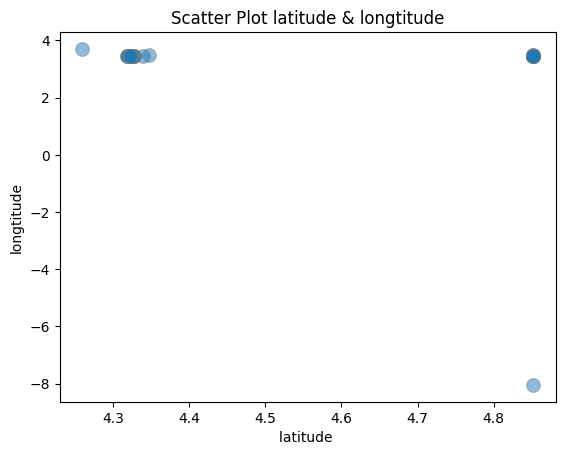

In [73]:
# plt.scatter 

ltt_array = np.array(np.log(latit_long[0]))
lng_array = np.array(np.log(latit_long[1]))


plt.scatter( ltt_array, lng_array , s=100, edgecolors='grey', linewidths=0.7, alpha=0.5)

# Προσθήκη ετικετών στους άξονες
plt.xlabel('latitude ')
plt.ylabel('longtitude')

plt.title('Scatter Plot latitude & longtitude')

plt.show()


* Το αποτέλεσμα δεν είναι ιδανικό.

* Πρώτον: το αποτύπωμα του κάθε σημείου είναι πολύ μεγάλο.

* Δεύτερον: τα σημεία είναι πάρα πολλά. Θα μπορούσαμε να τα κάνουμε κάπως διαφανή για να αποκτήσουμε μια καλύτερη ιδέα για την κατανομή τους.

* Τρίτον: μάλλον θα πρέπει να επικεντρώσουμε την προσοχή μας στο κάτω αριστερό κομμάτι της εικόνας. 

* Τέταρτον: η εικόνα μπορεί να μεγαλώσει.

* Τέλος, οι άξονες δεν προσφέρουν κάτι.

* Ευτυχώς, όλα αυτά μπορούμε να τα κάνουμε με το matplotlib.

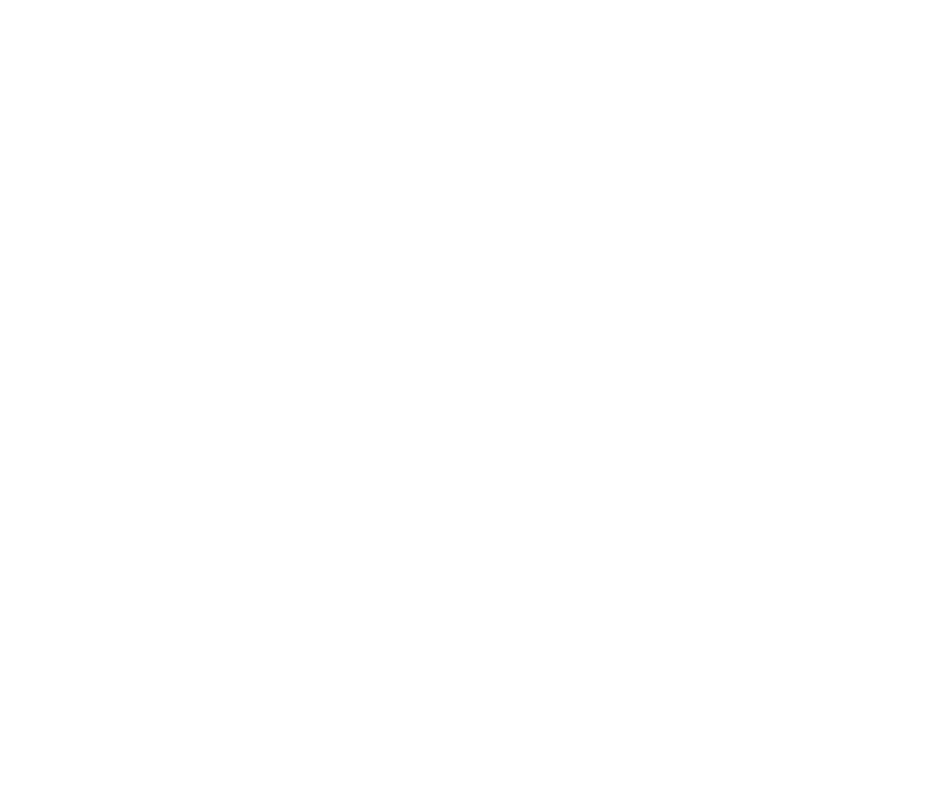

In [74]:

plt.figure(figsize=(12, 10))
plt.axis('equal')
plt.xlim(75.3, 75.55)
plt.ylim(31.65, 31.90)
plt.axis('off')
plt.gca().set_facecolor('white')
plt.scatter(ltt_array, lng_array, s=.1, alpha=.03, color='black') # get rid of matplotlib message output

plt.show()